In [1]:
# ---- Reproducibility
import random
import torch

seed = 1234
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.0369924  0.12349849 0.01266485 ... 0.20919041 0.20178125 0.15269329]
 [0.01256629 0.04195233 0.00430224 ... 0.0710618  0.06854491 0.05186978]
 [0.07442166 0.24845541 0.02547927 ... 0.42085123 0.40594542 0.3071898 ]
 ...
 [0.13003676 0.43412546 0.04451985 ... 0.73535219 0.70930731 0.53675188]
 [0.02568535 0.08575008 0.00879373 ... 0.14524951 0.14010503 0.10602124]
 [0.01213768 0.04052142 0.0041555  ... 0.06863803 0.06620699 0.05010061]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14788041  0.16955928  0.1824038  ...  0.06284919  0.26615598
   0.04153663]
 [-0.07975735  0.07738678 -0.06536086 ...  0.08710195  0.01799688
   0.10035783]
 [ 0.15693369  0.13496091 -0.12057474 ...  0.40187727  0.53974668
   0.3314774 ]
 ...
 [ 0.16086152  0.64130937  0.12866035 ...  0.67670073  0.59595961
   0.57849158]
 [-0.06675871 -0.03323521 -0.03429034 ...  0.1487228   0.2078188
   0.18898802]
 [-0.14480705  0.07884231  0.03359961 ... -0.16932926  0.1779711
   0.1486

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp",
                prior_L="exp") 

 

In [6]:
mycebmf.initialise_factors()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0080, -0.1905,  0.2605, -0.2120,  0.2116,  0.1896, -0.2458, -0.2640,
         0.1057,  0.1225,  0.0676,  0.0620, -0.0016,  0.1750,  0.1087, -0.0761,
         0.1078, -0.4832,  0.0641,  0.1960, -0.2287, -0.0704, -0.2441,  0.0377,
        -0.2611, -0.1291,  0.3901, -0.0387, -0.1331, -0.2875, -0.2095,  0.1439,
        -0.0307, -0.0648,  0.0598, -0.0430,  0.1896,  0.1109,  0.0643, -0.0023,
        -0.0328, -0.2137,  0.0720,  0.0039, -0.1591, -0.2714, -0.0136,  0.1367,
         0.0542,  0.2452])
tensor([ 0.0610,  0.0381, -0.0373,  0.1844, -0.0388, -0.1764,  0.0488, -0.3281,
        -0.0793,  0.0009,  0.2299,  0.1970,  0.0735, -0.2066,  0.0725, -0.2878,
        -0.0727,  0.3067, -0.2505,  0.0539,  0.1928,  0.0201, -0.0158,  0.1157,
         0.1509,  0.0815,  0.0377,  0.1380,  0.1188, -0.1703, -0.0225, -0.0766,
        -0.2759,  0.2154,  0.2396, -0.1764, -0.0045, -0.1609,  0.1603,  0.0669])


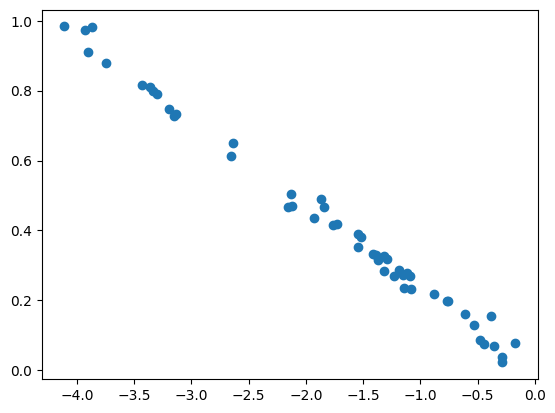

In [7]:
plt.scatter( mycebmf.L[:,0],u)

In [9]:
mycebmf.iter_once()
mycebmf._update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor([[2.3979e-03, 8.7359e-03, 1.7191e-03,  ..., 1.4849e-02, 1.2515e-02,
         9.4865e-03],
        [2.0907e-03, 7.6169e-03, 1.4989e-03,  ..., 1.2947e-02, 1.0912e-02,
         8.2713e-03],
        [7.0259e-03, 2.5596e-02, 5.0371e-03,  ..., 4.3506e-02, 3.6670e-02,
         2.7795e-02],
        ...,
        [7.3531e-02, 2.6788e-01, 5.2717e-02,  ..., 4.5533e-01, 3.8377e-01,
         2.9090e-01],
        [1.7455e-03, 6.3591e-03, 1.2514e-03,  ..., 1.0809e-02, 9.1101e-03,
         6.9054e-03],
        [2.5375e-04, 9.2444e-04, 1.8192e-04,  ..., 1.5713e-03, 1.3244e-03,
         1.0039e-03]])

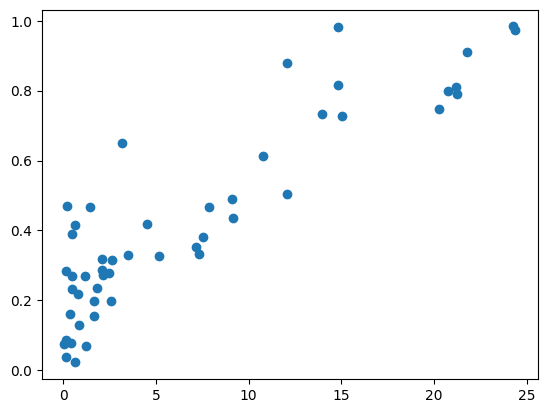

In [10]:
plt.scatter( mycebmf.L[:,0],u)

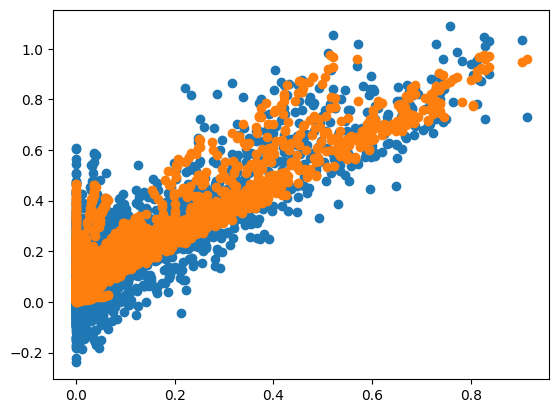

In [12]:
mycebmf.iter_once()  
mycebmf._update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [13]:
mycebmf.fit()

CEBMFResult(L=tensor([[ 7.6507],
        [ 1.2452],
        [15.3067],
        [12.4924],
        [10.9577],
        [ 8.7272],
        [ 5.3903],
        [ 8.1065],
        [ 7.7228],
        [27.7451],
        [23.8822],
        [ 1.9797],
        [22.2878],
        [18.8472],
        [ 8.1556],
        [ 9.8649],
        [ 9.7431],
        [ 5.3543],
        [22.7183],
        [18.7325],
        [ 8.3976],
        [10.0124],
        [10.7690],
        [10.9595],
        [ 2.5025],
        [ 2.0188],
        [15.0537],
        [ 9.1331],
        [26.6488],
        [13.0440],
        [27.9584],
        [ 9.3631],
        [23.6840],
        [13.7119],
        [ 9.3239],
        [27.4922],
        [ 3.3819],
        [ 3.7468],
        [15.1003],
        [ 7.9206],
        [13.2557],
        [12.2714],
        [29.2240],
        [ 2.6915],
        [23.4314],
        [ 6.2100],
        [22.3723],
        [24.3708],
        [ 4.3173],
        [ 3.1291]]), F=tensor([[0.0048],
        [0.019

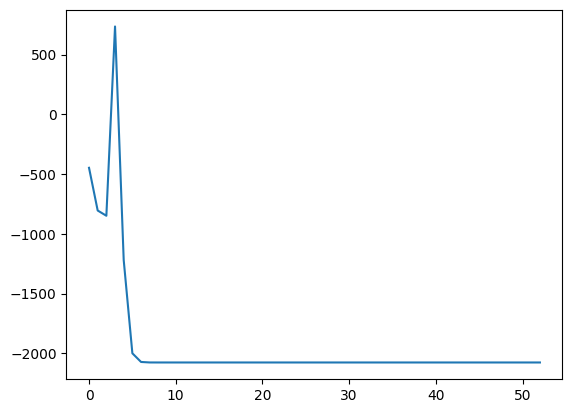

In [14]:
plt.plot(mycebmf.obj)

tensor(0.1050, dtype=torch.float64)

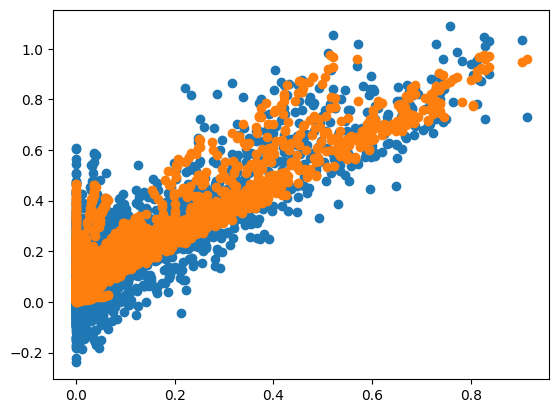

In [15]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [18]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp", prior_L="exp") 
    mycebmf.initialise_factors()
    mycebmf.fit()
    
    mycebmf._update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

KeyboardInterrupt: 

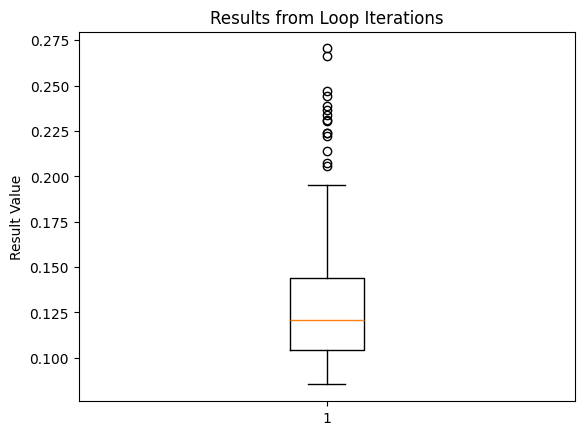

In [19]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [20]:
res= np.asarray(results)
np.mean(res )

np.float64(0.1373738328004129)

In [ ]:
0.1474302336345511

0.1474302336345511